# antiSMASH Parsing

    parsing script has to be run from the network at MPIPZ, but its not really necessessary becuase
    its only needed to parse the antiSMASH resulst which has already been done once... this creates
    files that are used by antiSMASH_PCA_BGCs.ipynb

# Imports


In [10]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.gridspec as gridspec

import seaborn as sns
sns.set(style='whitegrid')
import glob

import itertools as it

from collections import Counter

%config InteractiveShell.ast_node_interactivity='all'
%config InlineBackend.figure_format = 'svg'

pd.set_option('display.max_columns', 40)

from os.path import join as pjoin

# Get Data
    
#### !!! Once you have the counts data from the antiSMASH runs, this part shouldn't need to be run again !!!

In [12]:
# NETWORK FOLDER HAS TO BE CONNECTED since the data is too big 
# to store locally without depleting significant storage space



#****** this folder has to be loaded in order to start from the counts data ******
#path = '/media/mphome/projects/data/chlamy_sphere/as_output/*/*.xls'



#def counter(lst):
#    count_dict = {}
#    
#    for item in lst:
#        if item not in count_dict:
#            count_dict[item] = 1
#        else:
#            count_dict[item] +=1
#    
#    return count_dict

In [26]:
# global dataframe

clust_type_counts = {}
clust_set = set()
names = []
for file in glob.iglob(path):

    name = os.path.split(file)[0][52:]
    names.append(name)

    df = pd.read_excel(file, header=0)

    vals = df['Gene cluster type'].values

    clust_type_counts[name] = counter(vals)

   

In [14]:
#gdf = pd.DataFrame(clust_type_counts)
#gdf = gdf.transpose()
#gdf.index.name = 'alsphere_ID'

#sorted_cols=gdf.isna().sum().sort_values().index

#gdf = gdf[sorted_cols]

#sorted_rows = gdf.isna().sum(1).sort_values().index

#gdf = gdf.reindex(labels=sorted_rows)
#gdf.head() 

# Save Data
    
    Once the data is saved you can load it locally.... the data is just counts

In [15]:
# to csv
#path = '/home/rdmtinez/Desktop/MScThesis/data_o/antismash'
#fname= 'biosynthetic_gene_clusters_counts.csv'

In [16]:
# un-hash to resave
# gdf.to_csv(os.path.join(path,fname))

# Reload Processed Data

In [29]:
# ensure path to file is correct
path = '../data_o/antismash'
fname= 'biosynthetic_gene_clusters_counts.csv'
gdf = pd.read_csv(pjoin(path,fname), index_col=0)
gdf.index.name = 'alsphere_ID'
gdf.head()

,terpene,other,bacteriocin,siderophore,arylpolyene,nrps,hserlactone,phenazine,t3pks,phosphonate,arylpolyene-ladderane,t1pks-nrps,ladderane,lantipeptide,microviridin,arylpolyene-resorcinol,t1pks-otherks,arylpolyene-nrps,lassopeptide,resorcinol,acyl_amino_acids-siderophore,t1pks,thiopeptide,terpene-nrps,siderophore-nrps,ectoine,butyrolactone,otherks,sactipeptide-head_to_tail,lantipeptide-t1pks-nrps
alsphere_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Chlamy10,4.0,2.0,4.0,1.0,1.0,9.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
Chlamy15,6.0,2.0,1.0,3.0,4.0,7.0,NaN,1.0,NaN,1.0,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
Chlamy186,3.0,1.0,1.0,1.0,NaN,7.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,2.0,1.0,1.0,1.0,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Chlamy203,4.0,1.0,1.0,1.0,NaN,7.0,1.0,NaN,NaN,NaN,NaN,1.0,1.0,2.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Chlamy197,4.0,1.0,1.0,1.0,NaN,7.0,1.0,NaN,NaN,NaN,NaN,1.0,1.0,2.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
# THESE MAPPINGS ARE AMBIGOUS, REQUEST UNAMBIGOUS MAPPINGS
# merge with the counts data
fname = 'taxonomy_16S_clean.txt'

taxo_df = pd.read_csv(pjoin(path,fname), sep='\t', index_col=0).drop_duplicates()
taxo_df.index.name = 'alsphere_ID'
taxo_df.head()

,kingdom,phylum,class,order,family,genus
alsphere_ID,,,,,,
Chlamy6,Bacteria,Proteobacteria,Betaproteobacteria,Burkholderiales,Comamonadaceae,Variovorax
Chlamy7,Bacteria,Proteobacteria,Alphaproteobacteria,Sphingomonadales,Sphingomonadaceae,Sphingomonas
Chlamy8,Bacteria,Proteobacteria,Alphaproteobacteria,Rhizobiales,Bradyrhizobiaceae,Bosea
Chlamy16,Bacteria,Proteobacteria,Betaproteobacteria,Burkholderiales,Burkholderiaceae,Cupriavidus
Chlamy23,Bacteria,Actinobacteria,Actinobacteria,Actinomycetales,Micrococcaceae,Arthrobacter


In [32]:
taxo_df.columns = taxo_df.columns.str.title()

In [33]:
mdf = pd.concat([taxo_df, gdf], axis=1, sort=False) 
mdf.head(20)

,Kingdom,Phylum,Class,Order,Family,Genus,terpene,other,bacteriocin,siderophore,arylpolyene,nrps,hserlactone,phenazine,t3pks,phosphonate,arylpolyene-ladderane,t1pks-nrps,ladderane,lantipeptide,microviridin,arylpolyene-resorcinol,t1pks-otherks,arylpolyene-nrps,lassopeptide,resorcinol,acyl_amino_acids-siderophore,t1pks,thiopeptide,terpene-nrps,siderophore-nrps,ectoine,butyrolactone,otherks,sactipeptide-head_to_tail,lantipeptide-t1pks-nrps
Chlamy6,Bacteria,Proteobacteria,Betaproteobacteria,Burkholderiales,Comamonadaceae,Variovorax,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Chlamy7,Bacteria,Proteobacteria,Alphaproteobacteria,Sphingomonadales,Sphingomonadaceae,Sphingomonas,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Chlamy8,Bacteria,Proteobacteria,Alphaproteobacteria,Rhizobiales,Bradyrhizobiaceae,Bosea,2.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Chlamy16,Bacteria,Proteobacteria,Betaproteobacteria,Burkholderiales,Burkholderiaceae,Cupriavidus,6.0,3.0,1.0,2.0,1.0,NaN,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Chlamy23,Bacteria,Actinobacteria,Actinobacteria,Actinomycetales,Micrococcaceae,Arthrobacter,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Chlamy24,Bacteria,Proteobacteria,Gammaproteobacteria,Xanthomonadales,Xanthomonadaceae,Stenotrophomonas,NaN,NaN,1.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Chlamy26,Bacteria,Proteobacteria,Gammaproteobacteria,Aeromonadales,Aeromonadaceae,Aeromonas,NaN,NaN,1.0,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Chlamy28,Bacteria,Proteobacteria,Betaproteobacteria,Burkholderiales,Comamonadaceae,Acidovorax,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Chlamy40,Bacteria,Bacteroidetes,Flavobacteriia,Flavobacteriales,Flavobacteriaceae,Chryseobacterium,6.0,1.0,NaN,1.0,2.0,NaN,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Chlamy49,Bacteria,Proteobacteria,Alphaproteobacteria,Sphingomonadales,Sphingomonadaceae,Sphingopyxis,1.0,NaN,2.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
mdf = mdf.rename({'alsphere_ID':'strain'}, axis=1)

In [35]:
mdf.head()

,Kingdom,Phylum,Class,Order,Family,Genus,terpene,other,bacteriocin,siderophore,arylpolyene,nrps,hserlactone,phenazine,t3pks,phosphonate,arylpolyene-ladderane,t1pks-nrps,ladderane,lantipeptide,microviridin,arylpolyene-resorcinol,t1pks-otherks,arylpolyene-nrps,lassopeptide,resorcinol,acyl_amino_acids-siderophore,t1pks,thiopeptide,terpene-nrps,siderophore-nrps,ectoine,butyrolactone,otherks,sactipeptide-head_to_tail,lantipeptide-t1pks-nrps
Chlamy6,Bacteria,Proteobacteria,Betaproteobacteria,Burkholderiales,Comamonadaceae,Variovorax,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Chlamy7,Bacteria,Proteobacteria,Alphaproteobacteria,Sphingomonadales,Sphingomonadaceae,Sphingomonas,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Chlamy8,Bacteria,Proteobacteria,Alphaproteobacteria,Rhizobiales,Bradyrhizobiaceae,Bosea,2.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Chlamy16,Bacteria,Proteobacteria,Betaproteobacteria,Burkholderiales,Burkholderiaceae,Cupriavidus,6.0,3.0,1.0,2.0,1.0,NaN,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Chlamy23,Bacteria,Actinobacteria,Actinobacteria,Actinomycetales,Micrococcaceae,Arthrobacter,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
gbg = mdf[mdf['siderophore']>=1].groupby(by='Genus')
gbf = mdf[mdf['siderophore']>=1].groupby(by='Family')
gbo = mdf[mdf['siderophore']>=1].groupby(by='Order')
gbc = mdf[mdf['siderophore']>=1].groupby(by='Class')

In [37]:
gbg = mdf.groupby(by='Genus')
gbf = mdf.groupby(by='Family')
gbo = mdf.groupby(by='Order')



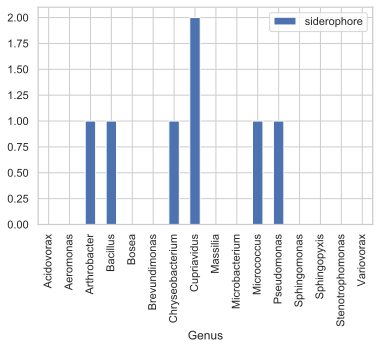

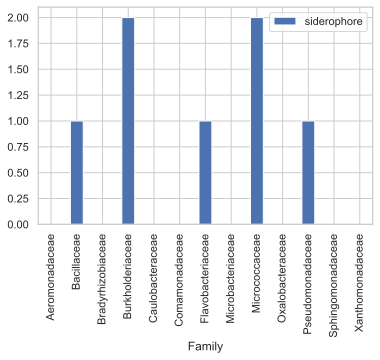

In [38]:
gbg.sum().plot(y='siderophore', kind='bar')
gbf.sum().plot(y='siderophore', kind='bar')
#gbo.sum().plot(y='siderophore', kind='bar')
#gbc.sum().plot(y='siderophore', kind='bar')
#gbp.sum().plot(y='siderophore', kind='bar')

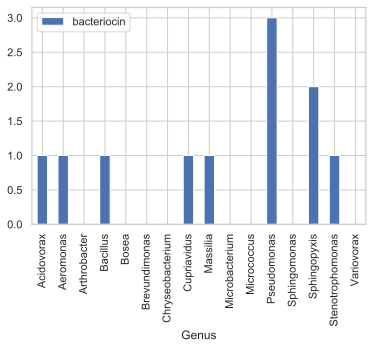

In [39]:
gbg.sum().plot(y='bacteriocin', kind='bar')

In [40]:
# list of strains that are chryseobacterium
mdf[(mdf['Genus']=='Chryseobacterium') & mdf['siderophore']>=1].index
mdf[(mdf['Genus']=='Cupriavidus') & mdf['siderophore']>=1].index

Index(['Chlamy40'], dtype='object')

Index(['Chlamy16'], dtype='object')

In [41]:
# *** 

#syncom = '/biodata/dep_psl/grp_rgo/chlamy/data/chlamy_007_SynCom.txt'


#sdf = pd.read_csv(syncom, sep=""'\t'"")

In [43]:
# sdf = sdf.set_index(keys='strain', drop=True)
# sdf.index.name = 'alsphere_ID'

NameError: name 'sdf' is not defined

In [ ]:
#sdf.sort_index()

In [9]:
#mdf[mdf.index.isin(sdf.index)].sort_index().to_csv('syncom_007_composition.csv')

In [ ]:
# sdf = sdf.drop(labels=['host', 'primers', 'NA'], axis=1)

In [ ]:
#sdf.reset_index().to_csv('syncom_007_composition.csv')

In [ ]:
detected = np.array(['Chlamy125','Chlamy74','Chlamy123',
            'Chlamy87','Chlamy149','Chlamy24',
            'Chlamy107','Chlamy19','Chlamy25',
            'Chlamy176','Chlamy23','Chlamy40'])


In [ ]:
#mdf[mdf.index.isin(detected)].to_csv('detected_syncom_007.csv')

In [ ]:
mdf[mdf.index.isin(detected)]

# Taxonomy Pre-Processing
    
    Save as ICL_taxonomic_mapping.csv and replace the obsolete one. Rerun, script to remove old errors.
    

In [9]:
chlamy_icl_taxa = pd.read_csv(pjoin(path, 'ICL_taxonomic_mapping.tsv'), sep='\t')
chlamy_icl_taxa = chlamy_icl_taxa.sort_values(by='alsphere_ID')
chlamy_icl_taxa = chlamy_icl_taxa.d



,alsphere_ID,Sample,Kingdom,Phylum,Class,Order,Family,Genus
4,Chlamy10,ICL_105,Bacteria,Bacteroidetes,Flavobacteriia,Flavobacteriales,Flavobacteriaceae,Chryseobacterium
5,Chlamy10,ICL_105,Bacteria,Proteobacteria,Betaproteobacteria,Burkholderiales,Comamonadaceae,Variovorax
6,Chlamy10,ICL_105,Bacteria,Proteobacteria,Gammaproteobacteria,Pseudomonadales,Pseudomonadaceae,Pseudomonas
93,Chlamy100,ICL_180A,Bacteria,Proteobacteria,Betaproteobacteria,Burkholderiales,Burkholderiaceae,Cupriavidus
94,Chlamy102,ICL_181,Bacteria,Bacteroidetes,Flavobacteriia,Flavobacteriales,Flavobacteriaceae,Chryseobacterium
95,Chlamy102,ICL_181,Bacteria,Proteobacteria,Gammaproteobacteria,Pseudomonadales,Pseudomonadaceae,Pseudomonas
96,Chlamy102,ICL_181,Bacteria,Proteobacteria,Gammaproteobacteria,Xanthomonadales,Xanthomonadaceae,Stenotrophomonas
97,Chlamy103,ICL_182,Bacteria,Bacteroidetes,Flavobacteriia,Flavobacteriales,Flavobacteriaceae,Chryseobacterium
98,Chlamy104,ICL_183A,Bacteria,Proteobacteria,Betaproteobacteria,Burkholderiales,Burkholderiaceae,Cupriavidus
99,Chlamy106,ICL_184A,Bacteria,Bacteroidetes,Flavobacteriia,Flavobacteriales,Flavobacteriaceae,Chryseobacterium
